In [33]:
import pandas as pd 
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler



dfgesamt = pd.read_csv('Gesamt.csv')
dfattackers = pd.read_csv('OFF.csv')
dfmidfielders = pd.read_csv('MID.csv')
dfdefenders = pd.read_csv('DEF.csv')
dfmaster = pd.read_csv('Master.csv')
dfpivot = pd.read_csv('Pivot.csv')
dfwerte = pd.read_csv('Fifa werte.csv')



In [ ]:
dfgesamt
print(dfgesamt.dtypes)

In [ ]:
print(dfgesamt.info())
print(dfgesamt.isnull().sum())

#duplicates = df.duplicated
#print(df[duplicates])

#df.drop_duplicates(inplace=True)

In [ ]:
#Deleting entries with missing values, using only numerical data in the dataset

#Rows
#df.dropna(inplace=True)

#Columns
#df.dropna(axis=1, inplace = True)

In [1]:
#plt.hist(df['rating'])
##plt.ylabel('Fifa ability')
#plt.show()


NameError: name 'plt' is not defined

In [20]:
corr1 = dfgesamt.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr1, annot=True, cmap='coolwarm')
plt.title("Real performance correlation")
plt.show()

C:\Users\Shubhamdutt\AppData\Local\Temp\ipykernel_18456\3053529704.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr1 = dfgesamt.corr()


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x1000 with 0 Axes>

C:\Users\Shubhamdutt\AppData\Local\Temp\ipykernel_18456\4140526067.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dfwerte.corr()


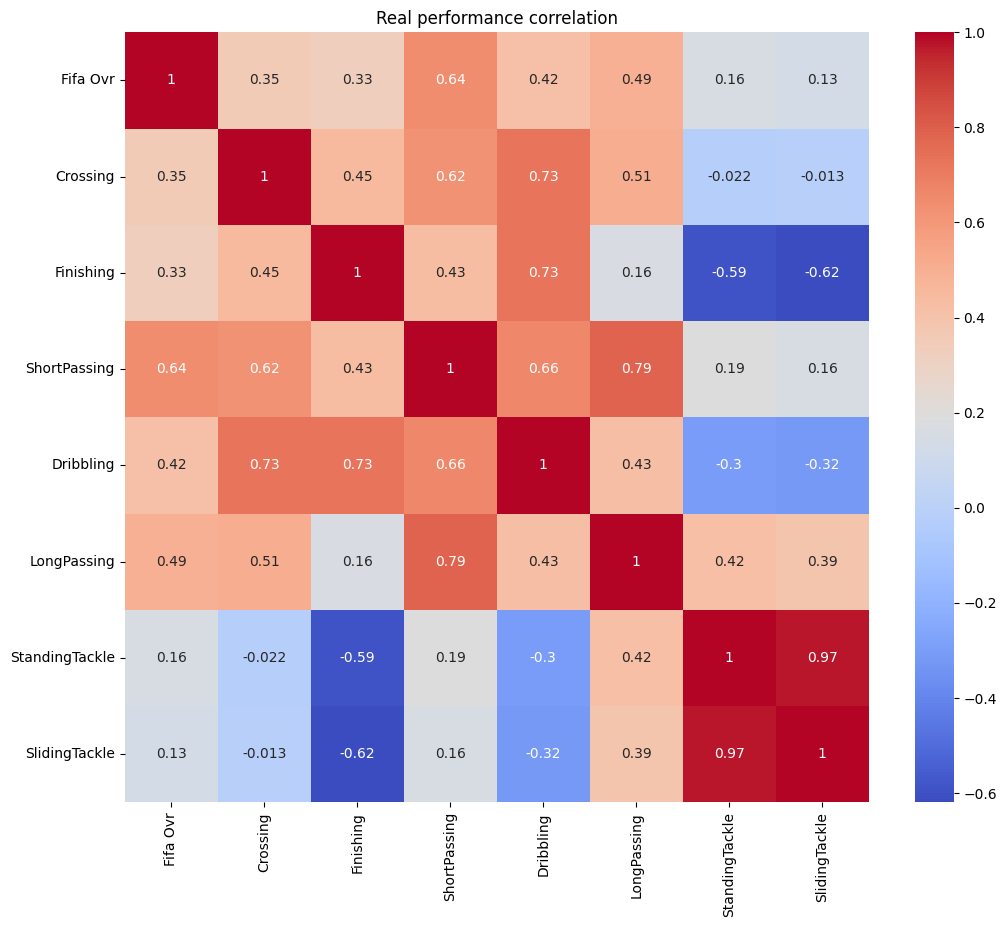

In [19]:
corr = dfwerte.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Real performance correlation")
plt.show()

Text(0, 0.5, 'Short Passing')

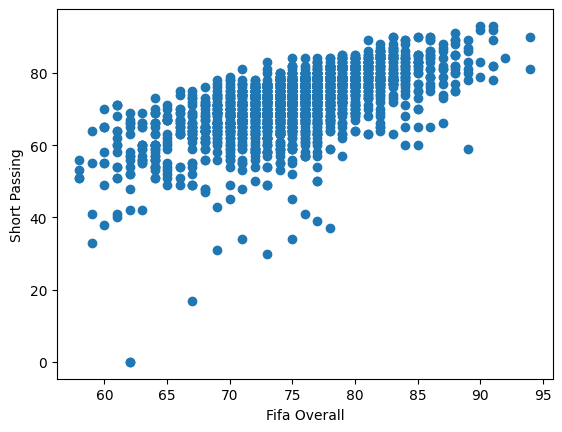

In [4]:
plt.scatter(dfwerte['Fifa Ovr'], dfwerte['ShortPassing'])

plt.xlabel('Fifa Overall')
plt.ylabel('Short Passing')

c:\Users\Shubhamdutt\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Shubhamdutt\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Shubhamdutt\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Shubhamdutt\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

49


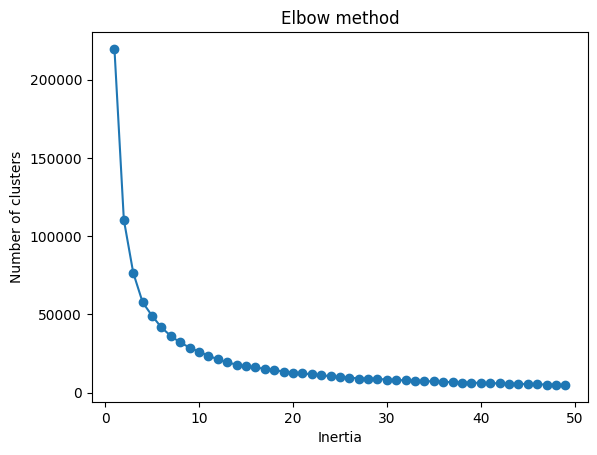

In [27]:
#Elbow method helps find K (Number of clusters)

#data = list(zip(dfwerte['Fifa Ovr']),(dfwerte['ShortPassing']))
FifaOvr = dfwerte['Fifa Ovr']
ShortPassing = dfwerte['ShortPassing']

data = list(zip(ShortPassing, FifaOvr))

inertias = []

for i in range(1,50):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,50), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Inertia')
plt.ylabel('Number of clusters')
plt.show

print(i)

In [10]:
(dfwerte['Fifa Ovr']).count()
(dfwerte['ShortPassing']).count()

2137

In [35]:

kmeans = KMeans(n_clusters=49)
kmeans.fit(data)

plt.scatter(FifaOvr, ShortPassing, c=kmeans.labels_)
plt.xlabel('Fifa Overall')
plt.ylabel('Short Passing')
plt.show()


NameError: name 'data' is not defined

In [36]:
x = dfwerte['Fifa Ovr']
y = dfwerte[[[[[[['Crossing', 'Finishing', 'ShortPassing', 'Dribbling', 'LongPassing', 'StandingTackle', 'SlidingTackle']]]]]]]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.8)

# Scale the features using StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

rf = RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define labels for x and y axes
labels = ['Positive', 'Negative']

# Plot confusion matrix as heatmap with axis labels
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

NameError: name 'X_train' is not defined

In [4]:
#y 

,Crossing,Finishing,ShortPassing,Dribbling,LongPassing,StandingTackle,SlidingTackle
0,62,91,83,85,65,42,19
1,72,69,90,90,87,63,65
2,72,72,82,82,80,59,53
3,79,57,76,69,62,79,74
4,40,84,70,72,35,51,46
...,...,...,...,...,...,...,...
2132,60,50,74,68,68,56,52
2133,41,65,60,55,38,25,24
2134,44,29,65,63,61,60,60
2135,50,51,70,68,73,77,73


In [21]:
#x_train 

613     74
989     74
830     75
450     72
1020    70
        ..
1694    82
1283    80
1936    76
1028    75
83      80
Name: Fifa Ovr, Length: 427, dtype: int64

In [30]:
#clf = LinearRegression()

In [31]:
#clf.fit(x_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[74 74 75 72 70 82 65 75 70 70 76 76 69 72 82 81 77 70 73 74 73 80 72 80
 71 76 77 83 77 83 74 78 82 73 81 75 70 74 74 71 71 70 74 74 67 73 75 73
 82 75 73 68 63 72 77 68 76 75 74 80 61 75 72 72 74 75 82 74 78 77 76 64
 79 84 72 61 74 77 76 74 66 75 66 80 74 80 72 75 72 80 80 75 73 80 74 77
 74 74 83 77 77 80 77 81 83 70 72 80 77 76 82 73 78 81 82 73 72 84 74 77
 75 75 76 75 78 76 83 79 76 74 75 73 75 75 75 80 79 74 79 71 67 74 67 69
 75 76 75 70 75 77 73 80 74 64 73 73 75 78 73 78 76 72 63 71 74 77 74 71
 72 70 70 76 80 74 74 79 83 77 77 75 78 75 71 75 82 75 68 79 74 75 78 77
 71 74 72 73 76 72 73 69 63 67 72 77 73 59 74 77 73 73 72 64 69 81 85 86
 75 81 81 80 77 87 75 73 73 92 76 66 77 78 75 72 84 69 75 76 73 75 81 76
 67 61 72 75 84 61 78 77 71 68 73 64 84 60 64 72 60 76 62 85 79 76 68 74
 72 75 68 79 75 77 75 74 72 77 83 76 82 74 81 68 65 76 76 68 79 63 78 72
 75 70 71 85 76 77 77 64 76 72 81 91 75 77 72 79 75 75 78 74 69 65 79 77
 76 74 77 76 83 84 66 72 79 80 72 65 71 79 72 76 76 72 77 75 83 81 78 71
 74 80 74 68 72 80 71 63 86 75 76 71 80 71 71 72 72 85 78 67 82 73 83 80
 73 76 73 80 76 86 72 69 72 76 80 79 74 71 68 72 77 80 81 80 82 72 75 67
 76 75 84 72 77 75 75 80 81 74 82 77 75 80 79 77 76 76 65 74 82 80 87 78
 59 71 73 72 76 77 76 89 72 78 74 83 65 73 82 80 76 75 80].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [29]:
#clf.predict(x_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
#y_test

In [11]:
#clf.score(x_test, y_test)
#Shows accuracy

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.